## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 105us/step - loss: 2.2895 - accuracy: 0.1476 - val_loss: 2.2369 - val_accuracy: 0.1860
Epoch 2/500
50000/50000 [==============================] - 3s 62us/step - loss: 2.2085 - accuracy: 0.2114 - val_loss: 2.1782 - val_accuracy: 0.2236
Epoch 3/500
50000/50000 [==============================] - 3s 63us/step - loss: 2.1549 - accuracy: 0.2405 - val_loss: 2.1297 - val_accuracy: 0.2515
Epoch 4/500
50000/50000 [==============================] - 3s 64us/step - loss: 2.1110 - accuracy: 0.2595 - val_loss: 2.0894 - val_accuracy: 0.2642
Epoch 5/500
50000/50000 [==============================] - 3s 65us/step - loss: 2.0739 - accuracy: 0.2721 - val_loss: 2.0547 - val_accuracy: 0.2791
Epoch 6/500
50000/50000 [==============================] - 3s 68us/step - loss: 2.0406 - accuracy: 0.2829 - val_loss: 2.0231 - val_accuracy: 0.2894
Epoch 7/500
50000/50000 [==============================] - 4

50000/50000 [==============================] - 3s 51us/step - loss: 1.6753 - accuracy: 0.4182 - val_loss: 1.6784 - val_accuracy: 0.4147
Epoch 55/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.6719 - accuracy: 0.4185 - val_loss: 1.6767 - val_accuracy: 0.4131
Epoch 56/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.6685 - accuracy: 0.4210 - val_loss: 1.6723 - val_accuracy: 0.4176
Epoch 57/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.6652 - accuracy: 0.4216 - val_loss: 1.6705 - val_accuracy: 0.4179
Epoch 58/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.6621 - accuracy: 0.4227 - val_loss: 1.6661 - val_accuracy: 0.4217
Epoch 59/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.6590 - accuracy: 0.4246 - val_loss: 1.6653 - val_accuracy: 0.4220
Epoch 60/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.6557 - accuracy: 0.4255 - val_loss: 

50000/50000 [==============================] - 2s 50us/step - loss: 1.5374 - accuracy: 0.4648 - val_loss: 1.5570 - val_accuracy: 0.4555
Epoch 110/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.5356 - accuracy: 0.4661 - val_loss: 1.5559 - val_accuracy: 0.4572
Epoch 111/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.5335 - accuracy: 0.4652 - val_loss: 1.5541 - val_accuracy: 0.4576
Epoch 112/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.5315 - accuracy: 0.4679 - val_loss: 1.5524 - val_accuracy: 0.4585
Epoch 113/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.5298 - accuracy: 0.4671 - val_loss: 1.5498 - val_accuracy: 0.4592
Epoch 114/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.5281 - accuracy: 0.4679 - val_loss: 1.5487 - val_accuracy: 0.4549
Epoch 115/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.5259 - accuracy: 0.4679 - val_

Epoch 164/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.4457 - accuracy: 0.4971 - val_loss: 1.4919 - val_accuracy: 0.4732
Epoch 165/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.4439 - accuracy: 0.4966 - val_loss: 1.4913 - val_accuracy: 0.4757
Epoch 166/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.4424 - accuracy: 0.4974 - val_loss: 1.4880 - val_accuracy: 0.4769
Epoch 167/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.4408 - accuracy: 0.4975 - val_loss: 1.4844 - val_accuracy: 0.4799
Epoch 168/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.4393 - accuracy: 0.4994 - val_loss: 1.4883 - val_accuracy: 0.4771
Epoch 169/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.4374 - accuracy: 0.5001 - val_loss: 1.4833 - val_accuracy: 0.4815
Epoch 170/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.4360 - accuracy:

50000/50000 [==============================] - 3s 50us/step - loss: 1.3685 - accuracy: 0.5226 - val_loss: 1.4392 - val_accuracy: 0.4886
Epoch 219/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.3673 - accuracy: 0.5233 - val_loss: 1.4407 - val_accuracy: 0.4913
Epoch 220/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.3656 - accuracy: 0.5243 - val_loss: 1.4435 - val_accuracy: 0.4861
Epoch 221/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.3642 - accuracy: 0.5255 - val_loss: 1.4347 - val_accuracy: 0.4897
Epoch 222/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.3628 - accuracy: 0.5267 - val_loss: 1.4352 - val_accuracy: 0.4891
Epoch 223/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.3619 - accuracy: 0.5252 - val_loss: 1.4401 - val_accuracy: 0.4897
Epoch 224/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.3604 - accuracy: 0.5249 - val_

Epoch 273/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.2996 - accuracy: 0.5481 - val_loss: 1.4032 - val_accuracy: 0.5019
Epoch 274/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.2988 - accuracy: 0.5486 - val_loss: 1.4095 - val_accuracy: 0.5003
Epoch 275/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.2971 - accuracy: 0.5478 - val_loss: 1.4026 - val_accuracy: 0.5013
Epoch 276/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.2970 - accuracy: 0.5470 - val_loss: 1.4102 - val_accuracy: 0.4999
Epoch 277/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.2948 - accuracy: 0.5494 - val_loss: 1.3985 - val_accuracy: 0.5064
Epoch 278/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.2939 - accuracy: 0.5487 - val_loss: 1.4074 - val_accuracy: 0.5017
Epoch 279/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.2926 - accuracy:

50000/50000 [==============================] - 2s 50us/step - loss: 1.2384 - accuracy: 0.5692 - val_loss: 1.3809 - val_accuracy: 0.5132
Epoch 328/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.2385 - accuracy: 0.5683 - val_loss: 1.3824 - val_accuracy: 0.5093
Epoch 329/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.2377 - accuracy: 0.5679 - val_loss: 1.4191 - val_accuracy: 0.4975
Epoch 330/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.2361 - accuracy: 0.5691 - val_loss: 1.3854 - val_accuracy: 0.5074
Epoch 331/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.2348 - accuracy: 0.5702 - val_loss: 1.3710 - val_accuracy: 0.5120
Epoch 332/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.2339 - accuracy: 0.5699 - val_loss: 1.3988 - val_accuracy: 0.5095
Epoch 333/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.2328 - accuracy: 0.5705 - val_

Epoch 382/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.1810 - accuracy: 0.5881 - val_loss: 1.3715 - val_accuracy: 0.5163
Epoch 383/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.1801 - accuracy: 0.5885 - val_loss: 1.4509 - val_accuracy: 0.4811
Epoch 384/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.1795 - accuracy: 0.5900 - val_loss: 1.3683 - val_accuracy: 0.5123
Epoch 385/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.1775 - accuracy: 0.5889 - val_loss: 1.3616 - val_accuracy: 0.5174
Epoch 386/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.1773 - accuracy: 0.5910 - val_loss: 1.3900 - val_accuracy: 0.5115
Epoch 387/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.1768 - accuracy: 0.5893 - val_loss: 1.3565 - val_accuracy: 0.5185
Epoch 388/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.1745 - accuracy:

50000/50000 [==============================] - 2s 49us/step - loss: 1.1274 - accuracy: 0.6070 - val_loss: 1.3795 - val_accuracy: 0.5154
Epoch 437/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.1243 - accuracy: 0.6089 - val_loss: 1.3580 - val_accuracy: 0.5229
Epoch 438/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.1240 - accuracy: 0.6085 - val_loss: 1.3662 - val_accuracy: 0.5154
Epoch 439/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.1239 - accuracy: 0.6070 - val_loss: 1.3736 - val_accuracy: 0.5118
Epoch 440/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.1236 - accuracy: 0.6075 - val_loss: 1.4228 - val_accuracy: 0.4943
Epoch 441/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.1211 - accuracy: 0.6081 - val_loss: 1.3461 - val_accuracy: 0.5208
Epoch 442/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.1208 - accuracy: 0.6100 - val_

Epoch 491/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.0729 - accuracy: 0.6262 - val_loss: 1.3457 - val_accuracy: 0.5256
Epoch 492/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.0719 - accuracy: 0.6263 - val_loss: 1.3449 - val_accuracy: 0.5270
Epoch 493/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.0724 - accuracy: 0.6264 - val_loss: 1.3526 - val_accuracy: 0.5204
Epoch 494/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.0705 - accuracy: 0.6281 - val_loss: 1.3635 - val_accuracy: 0.5252
Epoch 495/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.0682 - accuracy: 0.6279 - val_loss: 1.3734 - val_accuracy: 0.5189
Epoch 496/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.0712 - accuracy: 0.6256 - val_loss: 1.3553 - val_accuracy: 0.5229
Epoch 497/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.0670 - accuracy:

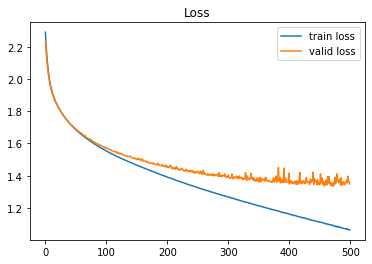

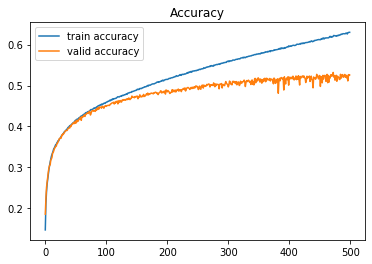

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()